In [3]:
%load_ext autoreload
%autoreload 2
import datajoint as dj
from pipeline import lab, get_schema_name, experiment, foraging_model, ephys, foraging_analysis
from pipeline.plot.foraging_model_plot import plot_session_model_comparison, plot_session_fitted_choice

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Query examples

Overview of all 2-lickport foraging sessions<br>
`session_task_protocol = 100` two-lickport foraging task<br>
`session_real_foraging` excludes very early training sessions where reward probabilities are [0, 1]

In [36]:
h2o = lab.WaterRestriction.proj('water_restriction_number')   # Water restriction number
foraging_sessions = (foraging_analysis.SessionTaskProtocol() * h2o                      
                     & 'session_task_protocol = 100' & 'session_real_foraging')
foraging_sessions

subject_id institution 6 digit animal ID,session session number,session_task_protocol the number of the dominant task protocol in the session,"session_real_foraging True if it is real foraging, false in case of pretraining",water_restriction_number WR number
447921,3,100,1,HC16
447921,4,100,1,HC16
447921,5,100,1,HC16
447921,6,100,1,HC16
447921,7,100,1,HC16
447921,8,100,1,HC16
447921,9,100,1,HC16
447921,10,100,1,HC16
447921,11,100,1,HC16
447921,12,100,1,HC16


How many sessions for each mouse

In [39]:
(h2o.aggr(foraging_sessions.proj(), num_sessions='count(*)') * h2o).fetch(format='frame', order_by='water_restriction_number')

,num_sessions,water_restriction_number
subject_id,,
453478,22,FOR01
453475,23,FOR02
453477,25,FOR03
453476,24,FOR04
455525,56,FOR05
455526,56,FOR06
457494,41,FOR07
457495,40,FOR08
457496,39,FOR09


Plot summary of an example session

In [4]:
sess_key={'subject_id': 482350, 'session': 52}

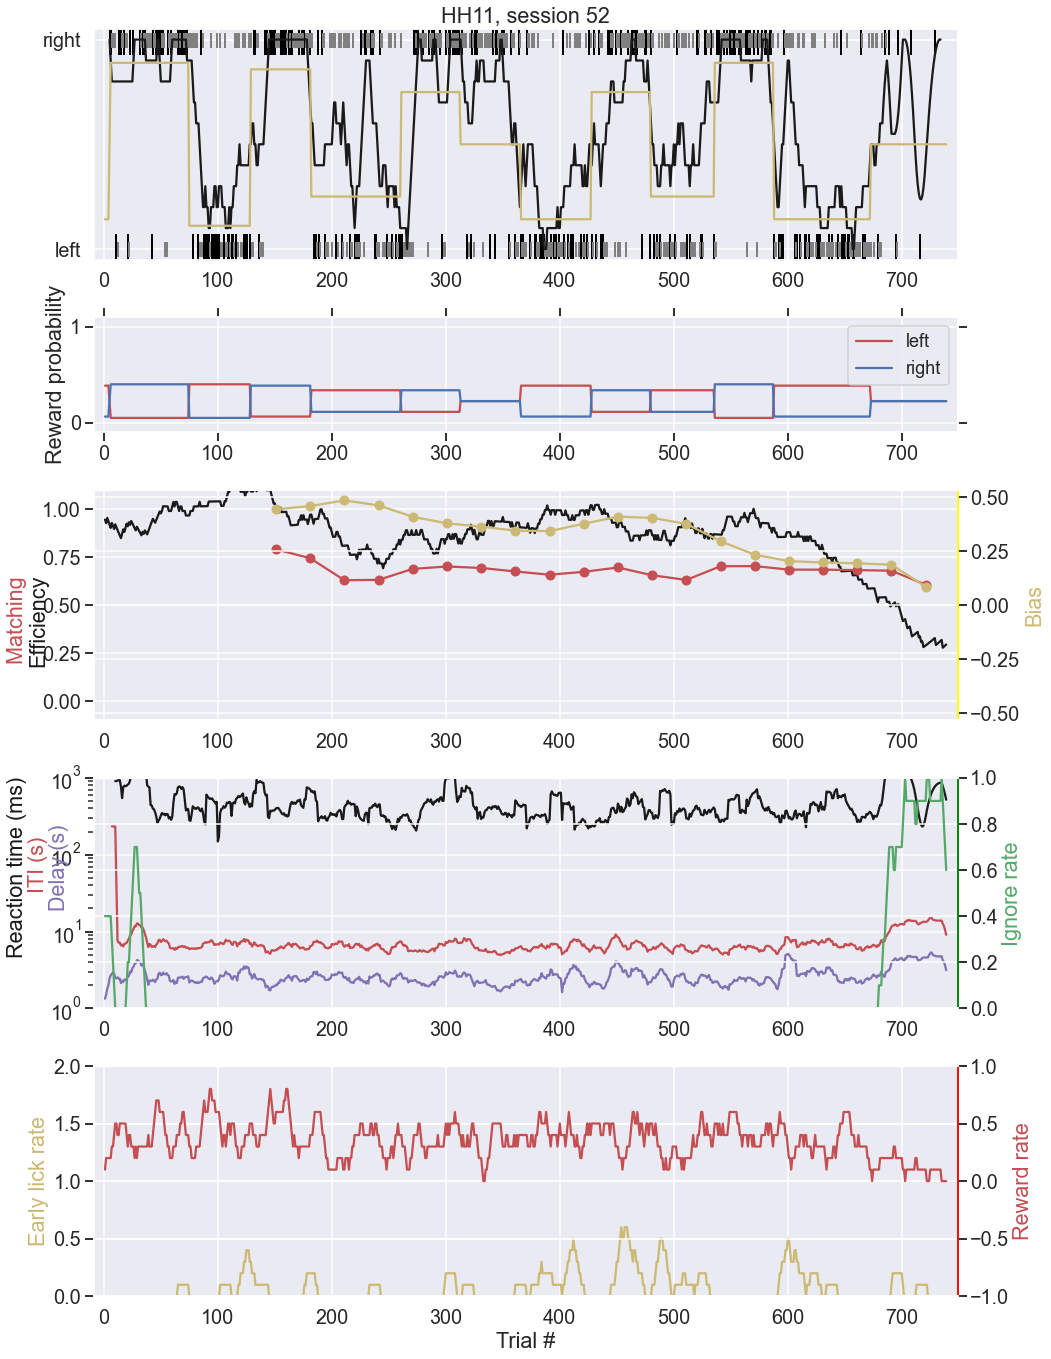

In [68]:
from pipeline.plot.foraging_plot import plot_foragingWebGUI_session
plot_foragingWebGUI_session(wr_name_selected=(h2o & sess_key).fetch1('water_restriction_number'), session_selected=sess_key['session'])

Model comparison results

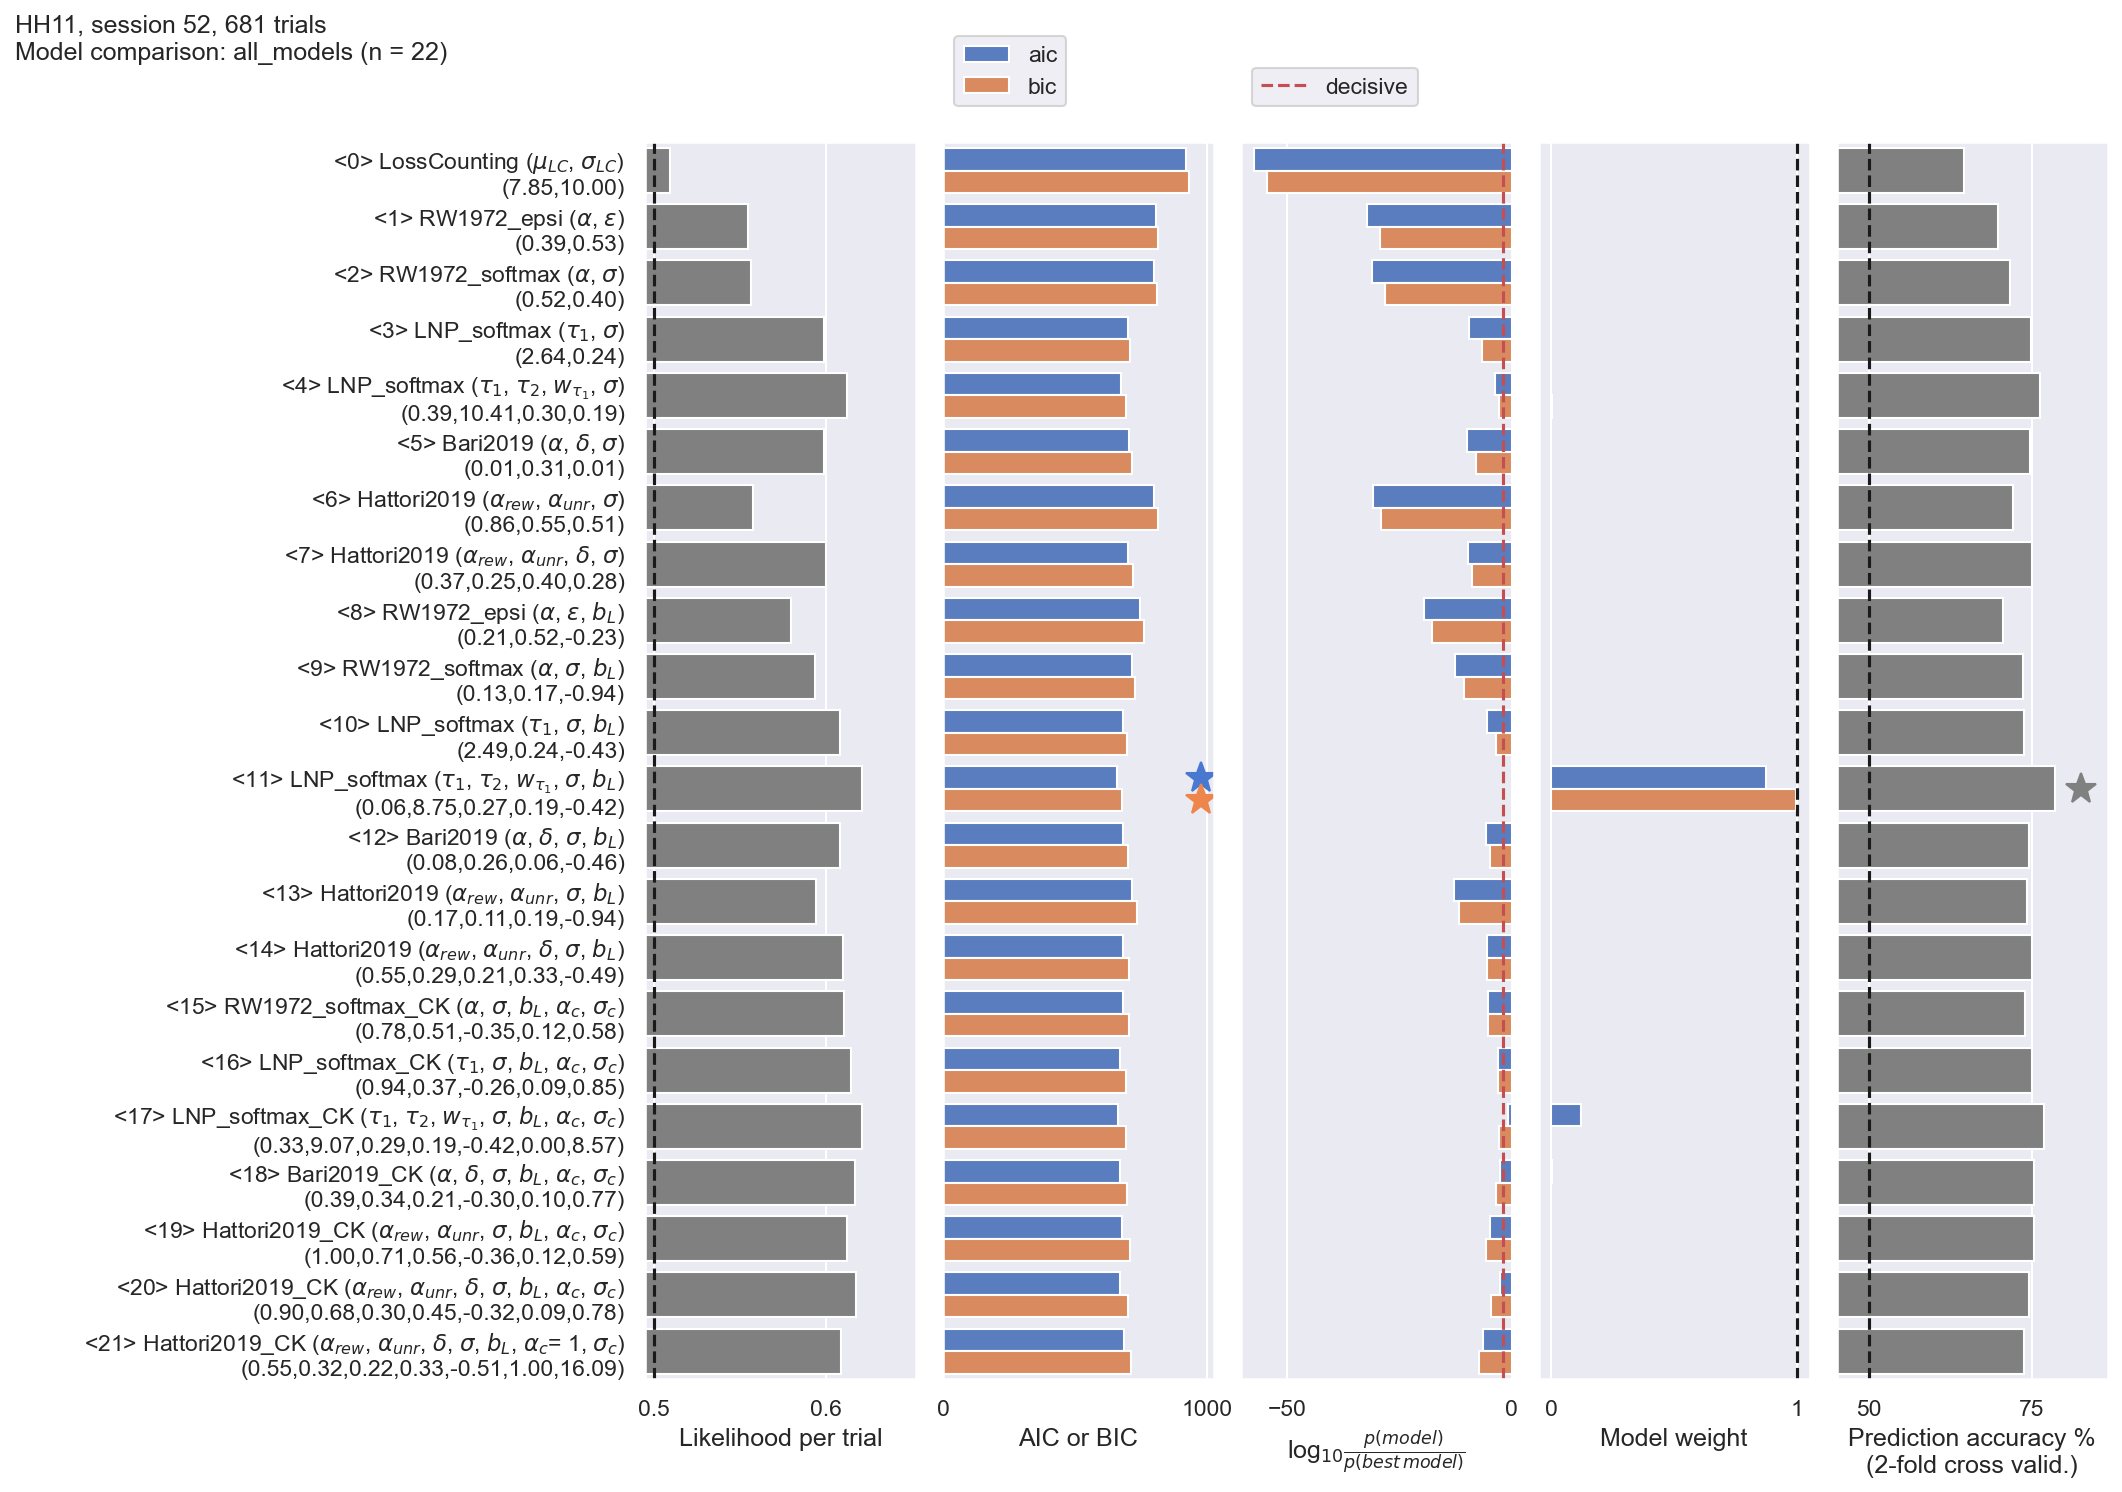

In [60]:
plot_session_model_comparison(sess_key=sess_key)

Fitted choice traces of best and worst models

D:\Han_Sync\Svoboda\Scripts\map-ephys\pipeline\plot\foraging_model_plot.py:188: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k|" (-> color='k'). The keyword argument will take precedence.
  ax.plot(np.nonzero(rewarded_trials)[0], 0.5 + (choice_history[0, rewarded_trials] - 0.5) * 1.4,


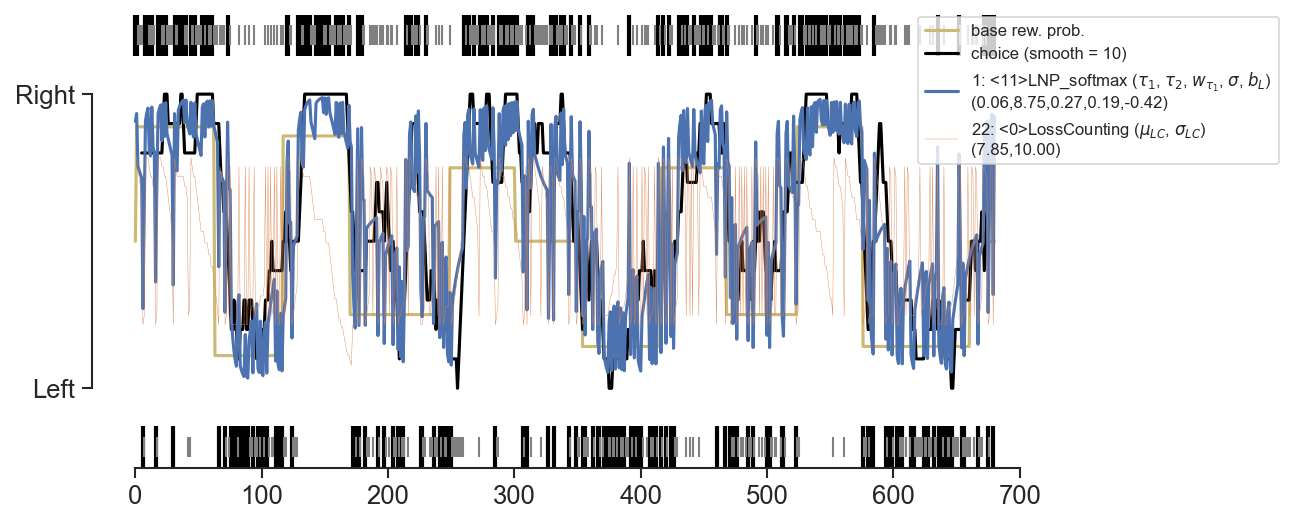

In [7]:
plot_session_fitted_choice(sess_key=sess_key, first_n=1, last_n=1, smooth_factor=10)

Get raw behavior data

In [10]:
from pipeline.foraging_model import get_session_history
choice_history, reward_history, p_reward, q_choice_outcome = get_session_history(sess_key, remove_ignored=False)

`choice_history` [1, trial_num]: 0 = left, 1 = right<br>
`reward_history` [2, trial_num]: first dim = left and right

In [11]:
choice_history

array([[None, None, None, None, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
        1, 1, 0, 0, 1, None, None, 1, None, None, None, None, None, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
        1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
        0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
        0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 

In [12]:
reward_history

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [13]:
p_reward

array([[0.386, 0.386, 0.386, ..., 0.225, 0.225, 0.225],
       [0.064, 0.064, 0.064, ..., 0.225, 0.225, 0.225]])